In [3]:
from googleapiclient.discovery import build
import pandas as pd
import seaborn as sns

In [4]:
#Api key from Google cloud
api_key='Your_google_api'
channel_ids=['UCAW-NpUFkMyCNrvRSSGIvDQ',
             'UCoz3Kpu5lv-ALhR4h9bDvcw']
youtube=build('youtube','v3',developerKey=api_key)

# Function to get Stats of Youtube Channels

In [5]:
def channel_stats(youtube,channel_ids):
    all_data=[]
    request= youtube.channels().list(
                            part='snippet,contentDetails,statistics',
                            id=','.join(channel_ids))
    response=request.execute()
    for i in range(len(response['items'])):
        data = dict(Channel_name=response['items'][i]['snippet']['title'],
                    Subscriber=response['items'][i]['statistics']['subscriberCount'],
                    Total_Views=response['items'][i]['statistics']['viewCount'],
                    Total_Videos=response['items'][i]['statistics']['videoCount'],
                    Playlist_id=response['items'][i]['contentDetails']['relatedPlaylists']['uploads'])
        all_data.append(data)

    return all_data
    

In [6]:
channel_statistics=channel_stats(youtube,channel_ids)

In [7]:
channel_data=pd.DataFrame(channel_statistics)


In [8]:
channel_data

,Channel_name,Subscriber,Total_Views,Total_Videos,Playlist_id
0,Ninja,23700000,2590221349,1836,UUAW-NpUFkMyCNrvRSSGIvDQ
1,Shroud,6790000,1072180324,1537,UUoz3Kpu5lv-ALhR4h9bDvcw


In [9]:
channel_data['Subscriber'] =pd.to_numeric(channel_data['Subscriber'])
channel_data['Total_Views'] =pd.to_numeric(channel_data['Total_Views'])
channel_data['Total_Videos'] =pd.to_numeric(channel_data['Total_Videos'])
channel_data.dtypes

Channel_name    object
Subscriber       int64
Total_Views      int64
Total_Videos     int64
Playlist_id     object
dtype: object

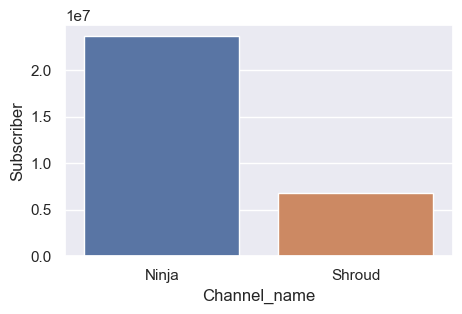

In [10]:
sns.set(rc={'figure.figsize':(5,3)})
ax=sns.barplot(x='Channel_name',y='Subscriber',data=channel_data)

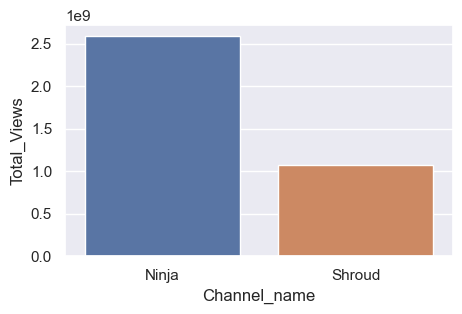

In [11]:
ax=sns.barplot(x='Channel_name',y='Total_Views',data=channel_data)

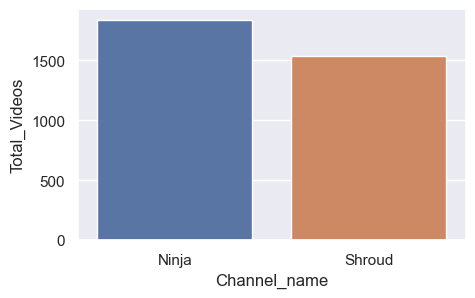

In [12]:
ax=sns.barplot(x='Channel_name',y='Total_Videos',data=channel_data)

# Function to fetch video ids

In [29]:
Playlist_id= channel_data.loc[channel_data['Channel_name']=='Shroud','Playlist_id'].iloc[0]
Playlist_id

'UUoz3Kpu5lv-ALhR4h9bDvcw'

In [30]:
def get_vid_ids(youtube, Playlist_id):
    video_id = []
    next_page_token = None
    
    while True:
        request = youtube.playlistItems().list(
            part='contentDetails',
            playlistId=Playlist_id,
            maxResults=50 if next_page_token is None else 10,
            pageToken=next_page_token
        )
        response = request.execute()

        for item in response.get('items', []):
            video_id.append(item['contentDetails']['videoId'])

        next_page_token = response.get('nextPageToken')

        if not next_page_token:
            break

    return video_id.head()


In [31]:
vid_ids = get_vid_ids(youtube,Playlist_id)
vid_ids 

['s5jx_uzGRzc',
 'OldxdAY6LM0',
 'Ry1k-vMUuHU',
 '8hRvH6HT_B0',
 'MfpVxyPLhp0',
 'Sy5-i6BS4dw',
 'Wm8efivX-rs',
 'dRxFvgDbIE0',
 '0IBRt9o7oZ8',
 'w63UKe-C2g8',
 'U-1Y7C3wI9A',
 'VuLqLBmy5VY',
 'tK7bv5ZM7Bc',
 'SSC17NQagdY',
 'dvd-fBzao1c',
 'YQkBvCG-Q6o',
 'LwbHbhs2ils',
 'OVPaxXcaWvs',
 'wwzo95hcZW8',
 'KMu3HV-UlKg',
 'OCCMvqdP1xQ',
 'xmf1kCTRKRU',
 'JXDoCJnaD20',
 'jifA7VSRN58',
 'aACwFPW2gnw',
 'D5QaPFoJgEY',
 'XGhV451gyB8',
 'EK6w_LKIAuI',
 'VcrbhxmsVZg',
 'LePOwKMckJs',
 'nweb2wsmvlU',
 'dNViYuXspRE',
 'Z0KXOqVui7Y',
 'tBxW_5BXwzc',
 '3F4v6BpjGuw',
 'OzqMrH6toOE',
 'hUE8Q2MhTs8',
 'c2o7KQfLtmU',
 'iPVDXndO-8A',
 'P7bG-1P5Jr8',
 '_8SaDxrKjdw',
 'xFIez-rRLCI',
 'x32ygExS7vg',
 'NzYdnoaT4W0',
 '9g7CwqLpjgE',
 'wi3lK5WDpbQ',
 'LhO8nN1AAnQ',
 'AxpY-tzlNCQ',
 'cIXBoj2s-eM',
 'Wpd5g_QvdvE',
 'r-LLeS8itFg',
 'EDHmoPTHwBM',
 'JCwYALgzW8E',
 'rvFTbJSblig',
 'XkGmleB0DME',
 'sxrOS1xx8VA',
 'XYUg06ouJ8o',
 'WirJRxLaeZw',
 'QcTWLEww2lE',
 'q0bXpbSiLQ0',
 'f-nBnSmAabk',
 'Kb5r5bbUs5s',
 'tleFqv

In [32]:
def get_vid_details(youtube,vid_ids):
    all_vid_ids=[]
    for i in range(0,len(vid_ids),50):
        request=youtube.videos().list(
                                part='snippet,statistics',
                                id=','.join(vid_ids)[i:i+50])
        response=request.execute()
        for video in response['items']:
            vid_stats = dict(Title = video['snippet']['title'],
                             Published_date = video['snippet']['publishedAt'],
                             Views = video['statistics']['viewCount'],
                             Likes = video['statistics']['likeCount'],
#                              Dislike = video['statistics']['dislikeCount'],
                             Comments = video['statistics']['commentCount'])
            all_vid_ids.append(vid_stats)
        
    return all_vid_ids

In [33]:
vid_details=get_vid_details(youtube,vid_ids)

In [34]:
Video_data=pd.DataFrame(vid_details)


In [35]:
Video_data['Published_date']=pd.to_datetime(Video_data['Published_date']).dt.date
Video_data['Views']=pd.to_numeric(Video_data['Views'])
Video_data['Likes']=pd.to_numeric(Video_data['Likes'])
Video_data['Comments']=pd.to_numeric(Video_data['Comments'])
Video_data

,Title,Published_date,Views,Likes,Comments
0,SHROUD CLIMBS TO THE TOP OF COUNTER STRIKE 2,2023-11-10,268249,7657,297
1,Shroud Reviews The NEWEST FPS Game,2023-11-01,455012,10405,557
2,SHROUD BECOMES A MENACE IN COUNTER STRIKE 2,2023-10-29,359126,8628,159
3,Counter Strike 2 But I'm Against The BEST Players,2023-10-18,366614,9018,157
4,Totally reasonable imo 😌,2023-10-11,311301,12888,115
...,...,...,...,...,...
99,HOW CS:GO PROS CLIMB TO RANK 1 IN VALORANT,2022-10-11,347511,12125,235
100,WHAT CS:GO MOVEMENT LOOKS LIKE IN VALORANT,2022-10-07,689605,20161,304
101,SHROUD & HIKO ARE MAKING A VALORANT TEAM,2022-10-04,277080,11583,219
102,9 MINUTES OF SHROUD DESTROYING TRASH TALKERS I...,2022-10-01,984820,31331,831


In [36]:
top_videos=Video_data.sort_values(by='Views',ascending=False)
top_videos.head(10)

,Title,Published_date,Views,Likes,Comments
39,There's no way right?...,2023-05-05,2600971,166759,537
19,Counterstrike or Valo?,2023-08-04,2510656,130182,2360
31,TenZ Beat Me So I Hired Him To Carry Me,2023-06-07,2053818,58731,606
64,One of the best Omen TPs of all time,2023-02-14,2013926,118640,272
51,MY FIRST GAME OF COUNTER STRIKE 2,2023-03-25,1458465,34087,1110
52,Shroud's Opinion On The New COUNTER STRIKE 2,2023-03-23,1443414,37451,1601
89,I have an announcement,2022-11-23,1235393,36812,1139
53,I'm making a Video Game,2023-03-16,1215605,43780,2738
50,SHROUD'S BEST PLAYS IN COUNTER STRIKE 2,2023-03-27,1179162,27341,874
102,9 MINUTES OF SHROUD DESTROYING TRASH TALKERS I...,2022-10-01,984820,31331,831


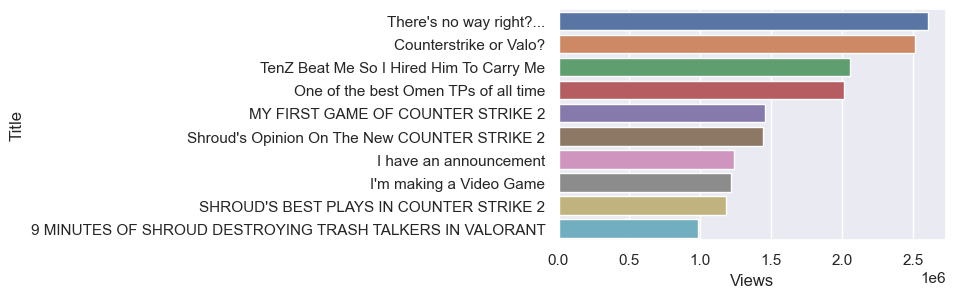

In [37]:
ax1=sns.barplot(x='Views',y='Title',data=top_videos.head(10))

In [38]:
Video_data

,Title,Published_date,Views,Likes,Comments
0,SHROUD CLIMBS TO THE TOP OF COUNTER STRIKE 2,2023-11-10,268249,7657,297
1,Shroud Reviews The NEWEST FPS Game,2023-11-01,455012,10405,557
2,SHROUD BECOMES A MENACE IN COUNTER STRIKE 2,2023-10-29,359126,8628,159
3,Counter Strike 2 But I'm Against The BEST Players,2023-10-18,366614,9018,157
4,Totally reasonable imo 😌,2023-10-11,311301,12888,115
...,...,...,...,...,...
99,HOW CS:GO PROS CLIMB TO RANK 1 IN VALORANT,2022-10-11,347511,12125,235
100,WHAT CS:GO MOVEMENT LOOKS LIKE IN VALORANT,2022-10-07,689605,20161,304
101,SHROUD & HIKO ARE MAKING A VALORANT TEAM,2022-10-04,277080,11583,219
102,9 MINUTES OF SHROUD DESTROYING TRASH TALKERS I...,2022-10-01,984820,31331,831


In [39]:
Video_data['Month']= pd.to_datetime(Video_data['Published_date']).dt.strftime('%b')
Video_data

,Title,Published_date,Views,Likes,Comments,Month
0,SHROUD CLIMBS TO THE TOP OF COUNTER STRIKE 2,2023-11-10,268249,7657,297,Nov
1,Shroud Reviews The NEWEST FPS Game,2023-11-01,455012,10405,557,Nov
2,SHROUD BECOMES A MENACE IN COUNTER STRIKE 2,2023-10-29,359126,8628,159,Oct
3,Counter Strike 2 But I'm Against The BEST Players,2023-10-18,366614,9018,157,Oct
4,Totally reasonable imo 😌,2023-10-11,311301,12888,115,Oct
...,...,...,...,...,...,...
99,HOW CS:GO PROS CLIMB TO RANK 1 IN VALORANT,2022-10-11,347511,12125,235,Oct
100,WHAT CS:GO MOVEMENT LOOKS LIKE IN VALORANT,2022-10-07,689605,20161,304,Oct
101,SHROUD & HIKO ARE MAKING A VALORANT TEAM,2022-10-04,277080,11583,219,Oct
102,9 MINUTES OF SHROUD DESTROYING TRASH TALKERS I...,2022-10-01,984820,31331,831,Oct


In [40]:
videos_per_month= Video_data.groupby('Month',as_index=False).size()
videos_per_month

,Month,size
0,Apr,8
1,Aug,9
2,Dec,8
3,Feb,9
4,Jan,10
5,Jul,6
6,Jun,6
7,Mar,10
8,May,9
9,Nov,8


In [41]:
sort_order = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

In [42]:
videos_per_month.index = pd.CategoricalIndex(videos_per_month['Month'],categories=sort_order,ordered=True)

In [43]:
videos_per_month = videos_per_month.sort_index()

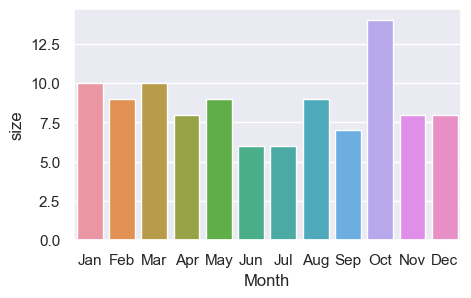

In [44]:
ax2 = sns.barplot(x="Month",y='size',data=videos_per_month)